# Colors and numpy

In [3]:
from typing import List
import PIL
from PIL import Image
print('Pillow Version:', PIL.__version__)
import numpy as np

Pillow Version: 8.1.0


## Utilities

Utility class to write and display a palette of colors

In [29]:

class PaletteWriter:
    def __init__(self, name: str):
        self.name = name
        self.colors = []
        
    def set_colors(self, colors: List):
        # Palette would be provided as [(R, G, B), ..]
        self.colors = colors
        return self
            
    def _create_image(self):
        number_of_colors = len(self.colors)
        block_size_pix = 50
        pixels = np.zeros((block_size_pix, number_of_colors*block_size_pix, 3)).astype(np.uint8)
        for i in range(number_of_colors):
            pixels[0:block_size_pix, i*block_size_pix:(i+1)*block_size_pix] = self.colors[i]
        new_img = Image.fromarray(pixels)
        return new_img
    
    def save(self):
        self._create_image().save(f"palette-{self.name}.png")
    
    def show(self):
        return self._create_image()

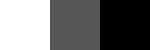

In [31]:
PaletteWriter("white-grey-black").set_colors([(255, 255, 255), (85, 86, 87), (0, 0, 0)]).show()